#Estudio de Factores de Riesgo de Enfermedades Cardiovasculares

Como temática de proyecto final se eligió el estudio de factores de riesgo en enfermedades cardiovasculares. 

Como Objetivo General se decidió que debía ser el siguiente:
>Encontrar qué factores de riesgo estan asociados a la aparicion de enfermedades cardiacas. 

Existen muchos estudios sobre este tema, pero se decidió utilizar el **Estudio Framingham**.

##Estudio Framingham de Enfermedades Cardiovasculares
El Estudio de Framingham o Estudio Framingham del Corazón (FHS) (en inglés Framingham Heart Study) es un estudio de cohortes de larga duración sobre el riesgo cardiovascular, que todavía se encuentra en marcha, realizado entre los residentes de Framingham, una ciudad del estado de Massachusetts en los Estados Unidos de América (EE. UU.).(1)

Este estudio se puso en marcha en 1948 con la participación inicial de 5.209 mujeres y hombres sanos de esta ciudad de entre 30 y 62 años, y en el que actualmente se incluye la tercera generación de participantes. Gracias a este estudio, que continúa siendo un referente en la actualidad, se dispone de diversos conocimientos sobre la epidemiología de los problemas cardiovasculares y los factores de riesgo asociados a su aparición.

Este estudio es uno de los primeros estudios prospectivos de base poblacional de la historia, pionero en la investigación epidemiológica de las enfermedades crónicas no infecciosas y en los métodos estadísticos y de análisis de datos  utilizados. Es por este motivo que ha tenido una amplia difusión en este campo.(2)







##Definiciones
###Factor de Riesgo
Toda circunstancia o situación que aumenta las probabilidades de una persona de contraer una enfermedad o cualquier otro problema de salud. Los factores de riesgo implican que las personas afectadas por dicho factor de riesgo, presentan un riesgo sanitario mayor al de las personas sin este factor.

##Fuente de Datos utilizada
El dataset utilizado es un dataset desarrollado por el Biologic Specimen and Data Repository Information Coordinating Center (BioLINCC)  utilizando el Estudio Framingham como fuente de datos. Corresponde a datos seleccionados del estudio original de cohortes Framingham, que cubre 3 ciclos de examen clínico los cuales corresponden a 20 años de seguimiento. El objetivo del dataset es el de aprendizaje, y no el desarrollo de publicaciones cientificas(3).
Este dataset fue modificado para la prediccion de pacientes con riesgo a 10 años de padecer una enfermedad coronaria, agregandosele una variable Target (TenYearCHD) y unificando los ciclos de examenes clinicos. El dataset esta alojado en Kaggle y es el utilizado es entre Trabajo.(4)


##Objetivos según el dataset hallado
> Encontrar qué factores de riesgo estan asociados a la aparicion de enfermedades cardíacas en un plazo de 10 años en la poblacion de Framingham, Massachusetts, entre los años 1968 y 1988.

##Diccionario de Datos
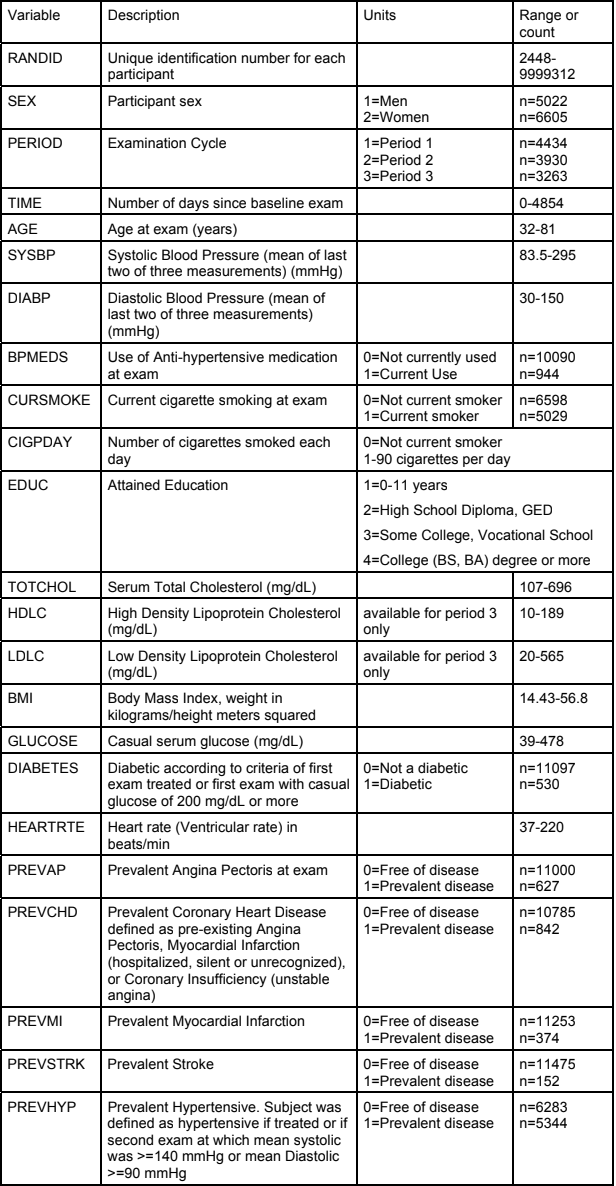


##Instalacion de Librerias

In [37]:
#Instalacion de librerias
  #Data Profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [145]:
#Librerias Utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib.ticker import FormatStrFormatter

#Librerias - Modelos de ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree


#Data Profiling
#import pandas_profiling

In [39]:
url = 'https://raw.githubusercontent.com/MatiasRogani/FraminghamStudy/main/framingham.csv'
df = pd.read_csv(url)

In [40]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [41]:
#Analizamos la forma del Dataframe
print('Este data set tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')

Este data set tiene 4240 filas, y 16 columnas


In [42]:
#Analizamos el tipo de dato de cada columna
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [43]:
#Creamos los diccionarios en español para cada variable
male_dict = {1: 'masculino', 0:'femenino'}
education_dict = {
    1:'sin titulo',
    2:'High School Diploma',
    3:'Vocational School',
    4:'College degre or more'
}
currentSmoker_dict = {1:'fumador', 0:'no fumador'}
BPMeds_dict = {1:True, 0:False}

#df['male'] = df['male'].map(male_dict)
#df['education'] = df['education'].map(education_dict)
#df['currentSmoker'] = df['currentSmoker'].map(currentSmoker_dict)
#df['BPMeds'] = df['BPMeds'].map(BPMeds_dict)


In [44]:
#Creamos los diccionarios para cambiar titulos de columnas
c_dict = {
    'male': 'sexo',
    'age': 'edad',
    'education': 'educacion',
    'currentSmoker': 'Fumador',
    'cigsPerDay': 'cigarrilosDiarios', 
    'BPMeds': 'medicamentosCardiacos',
    'prevalentStroke': 'prevalenciaACV', 
    'prevalentHyp': 'prevalenciaHipertension', 
    'diabetes': 'diabetes', 
    'totChol': 'colesterol', 
    'sysBP': 'presionSistolica',
    'diaBP': 'presionDiastolica', 
    'BMI': 'indiceMasaCorporal', 
    'heartRate': 'ritmoCardiaco', 
    'glucose': 'glucemia', 
    'TenYearCHD': 'EnfermedadCardiacaFutura'
}

#df.rename(columns=c_dict)

In [45]:
#Descripcion
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [46]:
#Vemos como se distribuye la variable objetivo.
df.groupby('TenYearCHD').count()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,3596,3596,3507,3596,3569,3554,3596,3596,3596,3555,3596,3596,3587,3596,3258
1,644,644,628,644,642,633,644,644,644,635,644,644,634,643,594


##Tratamiento Inicial de Valores Nulos

In [47]:
#Contamos la cantidad de nulos
df.isna().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

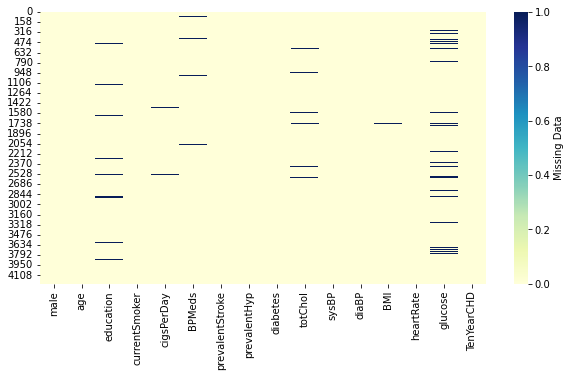

In [48]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.isna(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.show()

Se observa que hay valores nulos, pero no filas nulas. Para saber qué hacer con los registros con missing values, vamos a analizar cada variable y determinar el impacto de los valores nulos y posibles soluciones. 

##Screening inicial de los datos


In [49]:
#Data Profiling
#profile = pandas_profiling.ProfileReport(df)
#profile

In [50]:
df1 = df[['male','age', 'education', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
#sns.pairplot(data=df1, hue = 'TenYearCHD' , palette = 'Set2')

**Insigths:**

*   male:
  *   Mayor proporcion de enfermos en hombres.
  *   Los hombres fuman mayor cantidad de cigarrillos.
*   Age:
  *   A mayor edad, hay mas cantidad de enfermos cardiacos.
  *   A mayor edad, se fuman mayor cantidad de cigarrillos (pocos cigarrillos a edades tempranas).
  *   A edades mayores de 30 años se comienzan a tomar medicamentos para enfermedades cardiacas.
  *   A edades mayores de 30 años comienzan a aparecer ACVs.
  *   A edades menores a 30 años es menos frecuente ver presiones sistólicas elevadas.
  *   A edades mayores de 30 años comienzan a aparecer valores altos de glusemia.
*   Cantidad de cigarrillos por dia:
  *   La gente que toma medicamentos para el corazon fuma menos.
  *   los pacientes que sufrieron un ACV fuman menor cantidad de cigarrillos.
  *   Es menos probable que loss pacientes fumen si tienen elevado la glucemia, el BMI, la presion diastolica, la presion sistolica y el colesterol.
*   Pacientes sufrieron ACVs:
  *   Es menos probable observar gente que sufra ACVs con elevado colesterol total, con elevado colesterol total, con elevados niveles de glucemia y elevada frecuencia cardiaca.
*   Colesterol total:
  *   Se obsereva una correlacion lineal debil con las presiones sistolicas y diastolicas, asi como tambien con el BMI.
*   Presion sistolica: 
  *   Se observa una correlacion con la presion diaastolica.
  *   Se observa una correlacion debil con el BMI.
*   Presion diastolica: 
  *   Se observa una correlacion debil con el BMI.




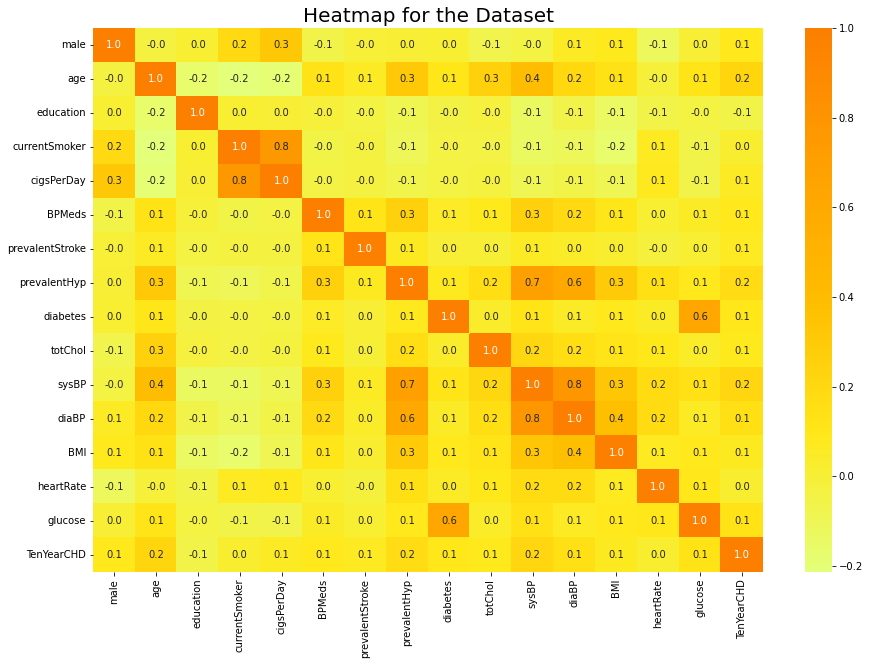

In [51]:
#Correlacion entre las variables
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.corr(), annot = True, cmap = 'Wistia', fmt='.1f')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

**Insights:** 

Se observan que estan fuertemente correlacionadas las siguientes variables:

1.   currentSmoker y cigsPerDay: la relacion se entiende porque cantidad de cigarrillos mayor a cero es una parte de la definicion de Fumador. Se podría pensar en sacar del modelo a currentSmoker.
2.   sysBP y prevalentHyp: la relacion se entiende porque presion sistolica elevada es parte de la definicion de hipertension. Se podría pensar en sacar del modelo a prevalentHyp.
3.   diaBP y prevalentHyp: la relacion se entiende porque presion diastolica elevada es parte de la definicion de hipertension. Se podría pensar en sacar del modelo a prevalentHyp.
3.   glucose y diabetes: la relacion se entiende porque la glucosa elevada es parte de la definicion de diabetes. Se podría pensar en sacar del modelo a diabetes.
3.   sysBP y diaBP.


##Analisis de Variables

###Glucosa



####Tipo de dato

In [52]:
#Tipo de dato
df['glucose'].dtype

dtype('float64')

El tipo de dato es el esperado.

####Distribución

moda:  75.0
mediana:  78.0
media:  81.96365524402907


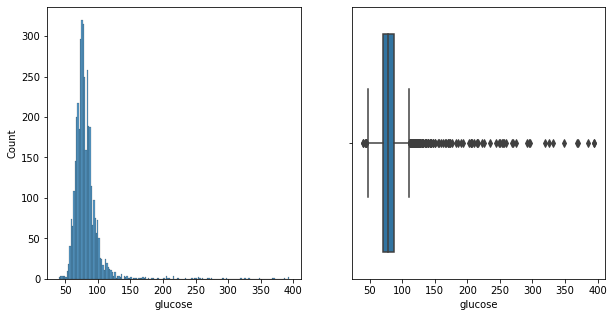

In [53]:
#Distribucion de la glucosa
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(ax=axes[0], data=df, x='glucose');
sns.boxplot(ax=axes[1], data=df, x='glucose');
fig.show()
print('moda: ', df['glucose'].mode()[0])
print('mediana: ', df['glucose'].median())
print('media: ', df['glucose'].mean())

- Se observa gran cantidad de outliers
- Se observa una asimetría positiva de la distribución



moda:  75.0
mediana:  77.0
media:  78.48853711790393


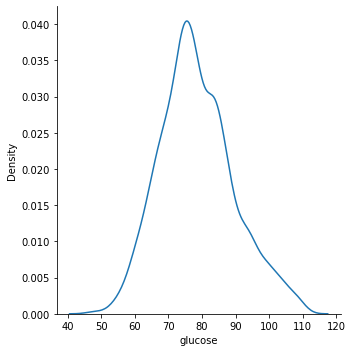

In [54]:
#Excluimos los valores Outlaiers del grafico para observar mejor la distribución
Q1 = df['glucose'].quantile(0.25)
Q3 = df['glucose'].quantile(0.75)
RIC = Q3 - Q1 
Lmin = Q1 - 1.5 * RIC
Lmax = Q3 + 1.5 * RIC

data = df['glucose'].loc[lambda x : (x <=Lmax) & (x >=Lmin)]
sns.displot(data=data, kind='kde')
print('moda: ', data.mode()[0])
print('mediana: ', data.median())
print('media: ', data.mean())

####Missing Values

In [55]:
#Porcentaje de missing values
missed = df['glucose'].isna().sum()
total = df['glucose'].isna().count()
print(f'El porcentaje de missing values es de {missed/total*100:.1f}%.')

El porcentaje de missing values es de 9.2%.


Es un porcentaje alto como para borrar todas las filas con valores nullos.

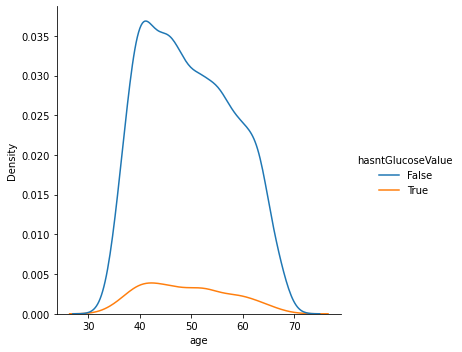

In [56]:
data = df.copy()
data['hasntGlucoseValue'] = data['glucose'].isna()

sns.displot(data=data,x='age' ,kind='kde', hue='hasntGlucoseValue')

In [57]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD',
       'hasntGlucoseValue'],
      dtype='object')

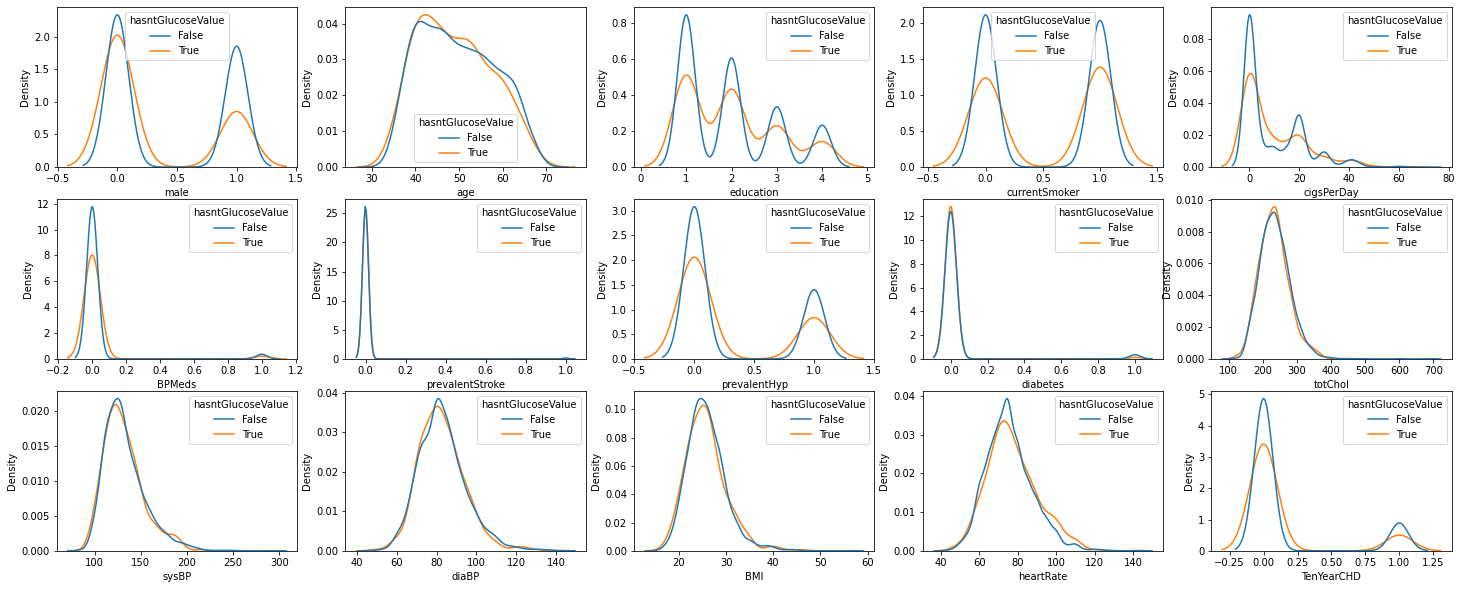

In [58]:
data = df.copy()
data['hasntGlucoseValue'] = data['glucose'].isna()

fig, axes = plt.subplots(3, 5, figsize=(25, 10))
sns.kdeplot(ax=axes[0,0], data=data, bw_adjust=1, common_norm=False, x='male', hue='hasntGlucoseValue');
sns.kdeplot(ax=axes[0,1], data=data, bw_adjust=1, common_norm=False, x='age', hue='hasntGlucoseValue');
sns.kdeplot(ax=axes[0,2], data=data, bw_adjust=1, common_norm=False, x='education', hue='hasntGlucoseValue');
sns.kdeplot(ax=axes[0,3], data=data, bw_adjust=1, common_norm=False, x='currentSmoker', hue='hasntGlucoseValue');
sns.kdeplot(ax=axes[0,4], data=data, bw_adjust=1, common_norm=False, x='cigsPerDay', hue='hasntGlucoseValue');
sns.kdeplot(ax=axes[1,0], data=data, bw_adjust=1, common_norm=False, x='BPMeds', hue='hasntGlucoseValue');
sns.kdeplot(ax=axes[1,1], data=data, bw_adjust=1, common_norm=False, x='prevalentStroke', hue='hasntGlucoseValue');
sns.kdeplot(ax=axes[1,2], data=data, bw_adjust=1, common_norm=False, x='prevalentHyp', hue='hasntGlucoseValue');
sns.kdeplot(ax=axes[1,3], data=data, bw_adjust=1, common_norm=False, x='diabetes', hue='hasntGlucoseValue');
sns.kdeplot(ax=axes[1,4], data=data, bw_adjust=1, common_norm=False, x='totChol', hue='hasntGlucoseValue');
sns.kdeplot(ax=axes[2,0], data=data, bw_adjust=1, common_norm=False, x='sysBP', hue='hasntGlucoseValue');
sns.kdeplot(ax=axes[2,1], data=data, bw_adjust=1, common_norm=False, x='diaBP', hue='hasntGlucoseValue');
sns.kdeplot(ax=axes[2,2], data=data, bw_adjust=1, common_norm=False, x='BMI', hue='hasntGlucoseValue');
sns.kdeplot(ax=axes[2,3], data=data, bw_adjust=1, common_norm=False, x='heartRate', hue='hasntGlucoseValue');
sns.kdeplot(ax=axes[2,4], data=data, bw_adjust=1, common_norm=False, x='TenYearCHD', hue='hasntGlucoseValue');
fig.show()

Segun se observa, las distribuciones entre los datos con valores de 'glucose' y sin estos, son similares. Excepto en la variable de género. Se observa que en los hombres existen mas missing values. Según los conocimientos de los expertos no existe una relación conocida entre los hombres y la falta de valores de Diabetes. Por este hecho, pensamos:
- Es poco probable que la falta de datos este relacionada a otra variable, o a la variable Traget (tenYearCHD). No se observan patrones de perdidas de datos, por lo que se suponen perdidas aleatorias.

Por este motivo se decide:


In [59]:
#por ahora los missing values se reemplazaran con la moda (mas adelante se probará un KNN)
df['glucose'] = df['glucose'].fillna(df['glucose'].mode()[0])


###Educacion
hay muchos missing values de esta variable (~2% de registros)


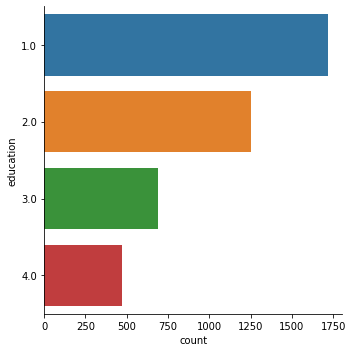

In [60]:
#Distribucion de education
sns.catplot(data=df, y="education", kind="count")

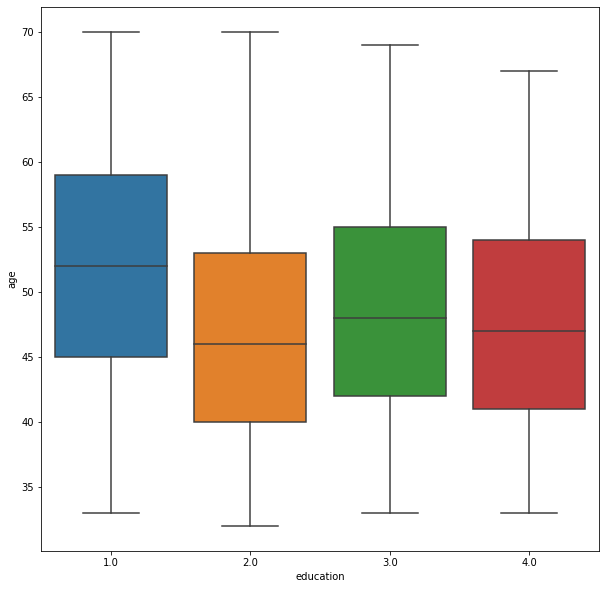

In [61]:
#Analisis de la relacion entre education y age
plt.figure(figsize = (10, 10))
sns.boxplot(y = 'age', x = 'education', data = df)
plt.show()

<Figure size 720x720 with 0 Axes>

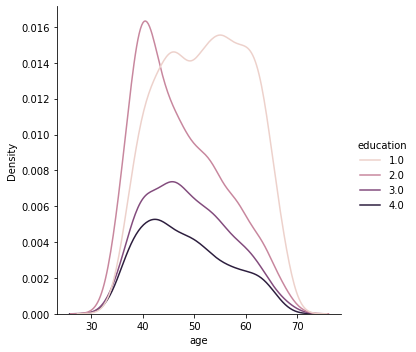

In [62]:
plt.figure(figsize = (10, 10))
sns.displot(x= 'age', hue= 'education', data = df, kind="kde")
plt.show()

In [63]:
#por ahora los missing values se reemplazaran con el valor mas frecuente
df['education'] = df['education'].fillna(df['education'].mode()[0])

###Edad

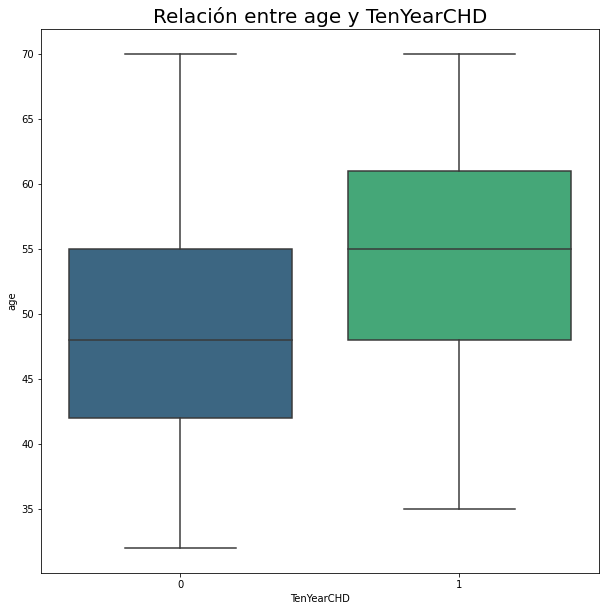

In [64]:
#Analisis de la relacion age vs TenYearCHD
plt.figure(figsize = (10, 10))
sns.boxplot(y=df['age'], x=df['TenYearCHD'], palette = 'viridis')
plt.title('Relación entre age y TenYearCHD', fontsize = 20)
plt.show()

**Edad:** se observa que los pacientes que tienen mas probabilidad de desarrollar una enfermedad cardiaca (tenYearCHD) son aquellos de mayort edad.

###Presión Sistólica

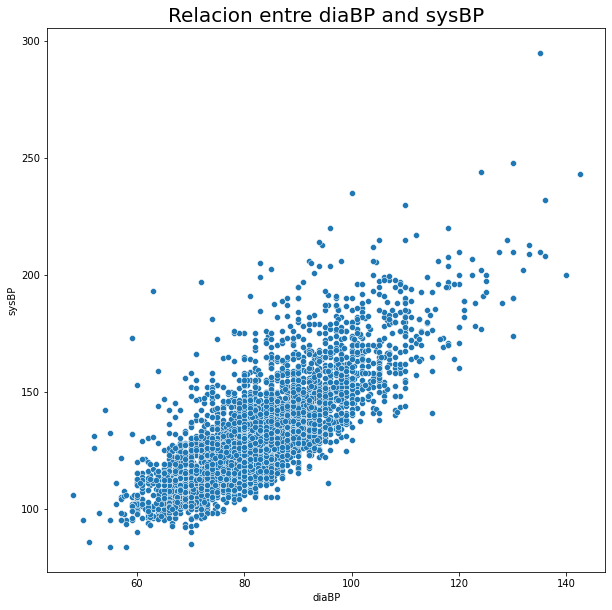

In [65]:
#Analisis de la relacion entre diaBP y sysBP
plt.figure(figsize = (10, 10))
sns.scatterplot(x="diaBP", y="sysBP", data=df)
plt.title('Relacion entre diaBP and sysBP', fontsize = 20, fontweight = 30)
plt.show();

Se observa que efectivamente hay una relacion entre la presion diastolica (diaBP) y la presion sistolica (sysBP) de tipo positiva, en donde si hay un incremento de la presion diastolica tambien hay un incremento de la presion sistolica.

###Otras variables
Por ahora se eliminan todos los missing values.


In [66]:
df = df.dropna()
df.count()

male               4090
age                4090
education          4090
currentSmoker      4090
cigsPerDay         4090
BPMeds             4090
prevalentStroke    4090
prevalentHyp       4090
diabetes           4090
totChol            4090
sysBP              4090
diaBP              4090
BMI                4090
heartRate          4090
glucose            4090
TenYearCHD         4090
dtype: int64

##Analisis Multivariado

##Resumen de operaciones realizadas al dataset original


##Datos listos para aplicar los modelos

In [67]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [68]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4090.0,0.434719,0.495781,0.00,0.00,0.0,1.00,1.0
age,4090.0,49.499511,8.542193,32.00,42.00,49.0,56.00,70.0
education,4090.0,1.958191,1.019479,1.00,1.00,2.0,3.00,4.0
currentSmoker,4090.0,0.490220,0.499965,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4090.0,8.995355,11.913388,0.00,0.00,0.0,20.00,70.0
BPMeds,4090.0,0.029340,0.168778,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4090.0,0.005379,0.073153,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4090.0,0.309291,0.462258,0.00,0.00,0.0,1.00,1.0
diabetes,4090.0,0.025428,0.157440,0.00,0.00,0.0,0.00,1.0
totChol,4090.0,236.659658,44.467756,113.00,206.00,234.0,263.00,696.0


In [70]:
#Contamos la cantidad de nulos
df.isna().sum().sort_values(ascending=False)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

##Modelos de Clasificación

###KNN


In [119]:
#Separamos en X e y
X = df.drop(["TenYearCHD"], axis=1)
y = df["TenYearCHD"]


In [120]:
#Escalado de los Datos
escalador = MinMaxScaler()
X = escalador.fit_transform(X)

In [121]:
#Separamos en train y test
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [122]:
#Creacion del modelo
clasificador = KNeighborsClassifier(n_neighbors=3)

clasificador.fit(X, y);

In [123]:
#Prediccion en Train
y_train_pred = clasificador.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('% de aciertos sobre el set de entrenamiento:',train_accuracy)


#Prediccion en Test
y_test_pred = clasificador.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


% de aciertos sobre el set de entrenamiento: 0.8843870066363954
% de aciertos sobre el set de evaluación: 0.8899755501222494


Se observa un buen rendimiento en los dos sets.

##Logistic Regresion

In [132]:
#Separamos en X e y
X = df.drop(["TenYearCHD"], axis=1)
y = df["TenYearCHD"]


In [133]:
#Escalado de los Datos
escalador = MinMaxScaler()
X = escalador.fit_transform(X)

In [134]:
#Separamos en train y test
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [135]:
#Creacion del modelo
clasificador = LogisticRegression()

clasificador.fit(X, y);

In [136]:
#Prediccion en Train
y_train_pred = clasificador.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('% de aciertos sobre el set de entrenamiento:',train_accuracy)


#Prediccion en Test
y_test_pred = clasificador.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


% de aciertos sobre el set de entrenamiento: 0.8581907090464548
% de aciertos sobre el set de evaluación: 0.8541157294213529


Se observa un buen rendimiento en los dos sets.

##Desicion Tree


In [147]:
#Separamos en X e y
X = df.drop(["TenYearCHD"], axis=1)
y = df["TenYearCHD"]


In [151]:
#Separamos en train y test
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [158]:
#Creacion del modelo
clasificador = DecisionTreeClassifier(max_depth=3, random_state=11)

clasificador.fit(X, y);

In [159]:
#Prediccion en Train
y_train_pred = clasificador.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('% de aciertos sobre el set de entrenamiento:',train_accuracy)


#Prediccion en Test
y_test_pred = clasificador.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


% de aciertos sobre el set de entrenamiento: 0.8529514495284667
% de aciertos sobre el set de evaluación: 0.8524857375713122


Podríamos estar ante un caso de overfiting.

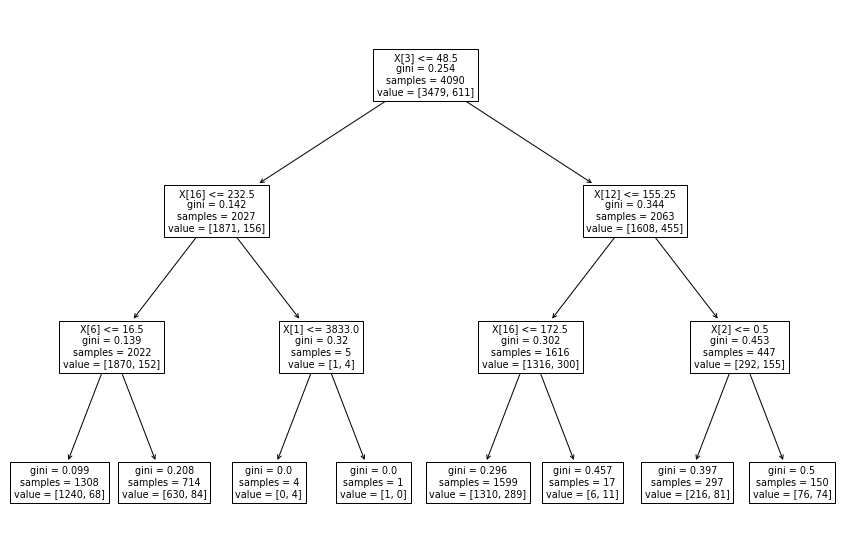

In [160]:
tree.plot_tree(clasificador);

##Random Forest

In [162]:
#Separamos en X e y
X = df.drop(["TenYearCHD"], axis=1)
y = df["TenYearCHD"]


In [163]:
#Separamos en train y test
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [166]:
#Creacion del modelo
clasificador = RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=20, random_state=11)

clasificador.fit(X, y);

In [167]:
#Prediccion en Train
y_train_pred = clasificador.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('% de aciertos sobre el set de entrenamiento:',train_accuracy)


#Prediccion en Test
y_test_pred = clasificador.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


% de aciertos sobre el set de entrenamiento: 0.9909186168354872
% de aciertos sobre el set de evaluación: 0.9902200488997555


Se observa un buen rendimiento en los dos sets.

##Referencias
(1) [Framingham Heart Study. Web oficial](https://www.framinghamheartstudy.org/)

(2) https://es.wikipedia.org/wiki/Estudio_de_Framingham

(3) https://biolincc.nhlbi.nih.gov/teaching/

(4) https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset

